In [5]:
import pandas as pd
import numpy as np
import matplotlib
import glob

from matplotlib import pyplot as plt

%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42

In [63]:
mat_dir = '../Overlapped-hits/Data-new/'

regions = pd.read_csv('../Overlapped-hits/enh_names.txt', sep='\t', header=None)

cell_num_array = np.array([])
for region in regions[0].values:
    fc_files = glob.glob(mat_dir + region + '*-foldchange.mat')

    if len(fc_files) == 1:
        fc_file = fc_files[0]
        cell_num = fc_file.split('/')[-1].split('-')[3]
    else:
        numbers = np.array([int(i.split('/')[-1].split('-')[3]) for i in fc_files])
        cell_num = np.max(numbers)
    cell_num_array = np.append(cell_num_array, int(cell_num))
    
    if int(cell_num) < 1000:
        print(region + ":" + '\t' + cell_num)

chr10-43455487-43455887:	856
chr11-33941648-33942048:	903
chr16-89004107-89004507:	977
chr18-12741296-12741696:	942
chr18-12772084-12772456:	955
chr18-22452112-22452512:	976
chr18-2854117-2854517:	855
chr18-3037377-3037777:	962
chr18-45998249-45998649:	992
chr18-48781204-48781604:	888
chr18-832114-832514:	976
chr18-9810978-9811378:	958
chr20-47360671-47361071:	963
chr6-135323137-135323537:	750
chr6-147196499-147196899:	988
chr6-36888999-36889399:	954


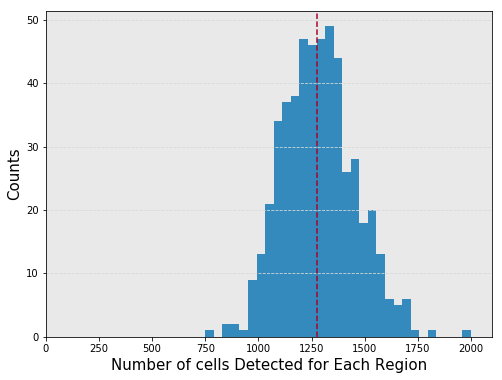

In [76]:
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(cell_num_array, bins = 200, color='#348ABD')
ax.axvline(np.median(cell_num_array), color='#A60628', linestyle='--')
ax.set_xlim([0,2100])

ax.yaxis.grid(color = '#d9d9d9', linestyle = '--')
ax.set_facecolor('#E9E9E9')

ax.set_ylabel('Counts', fontsize=15)
ax.set_xlabel('Number of cells Detected for Each Region', fontsize=15)
fig.savefig('Cells_per_region.pdf')

In [77]:
np.median(cell_num_array)

1276.0